In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option("plotting.backend", "plotly")

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# Data
## Load data (Diamond/data_cushion)

In [2]:
df = pd.read_csv('../input/natural-diamonds-prices-images/Diamonds/Diamonds/data_cushion.csv')
df

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price,Data Url
0,1771083,CUSHION,0.43,SI1,M,EX,EX,VG,M,4.38-4.34×2.72,683.22,https://capitalwholesalediamonds.com/product/0...
1,1524552,CUSHION,0.52,VS1,S-T,EX,EX,VG,M,4.55-4.38×2.97,718.92,https://capitalwholesalediamonds.com/product/0...
2,1651023,CUSHION,0.50,SI1,M,EX,EX,VG,F,4.86-4.23×2.87,725.32,https://capitalwholesalediamonds.com/product/0...
3,1632749,CUSHION,0.50,VS2,M,VG,EX,GD,N,4.51-4.47×2.98,771.13,https://capitalwholesalediamonds.com/product/0...
4,1660174,CUSHION,0.50,VVS2,M,EX,EX,VG,F,4.94-4.27×2.88,772.88,https://capitalwholesalediamonds.com/product/0...
...,...,...,...,...,...,...,...,...,...,...,...,...
425,211007-339,CUSHION,1.03,VS2,U-V,EX,EX,VG,N,5.88-5.54×3.72,"2,515.78",https://capitalwholesalediamonds.com/product/1...
426,1781753,CUSHION,0.90,SI1,FANCY,VG,EX,GD,M,5.12-4.95×3.90,"2,516.07",https://capitalwholesalediamonds.com/product/0...
427,1643520,CUSHION,0.75,SI1,F,EX,EX,VG,N,5.12-5.02×3.41,"2,516.77",https://capitalwholesalediamonds.com/product/0...
428,200689-17,CUSHION,1.20,VVS1,W-X,EX,EX,EX,N,6.20-5.74×3.86,"2,517.03",https://capitalwholesalediamonds.com/product/1...


## Regexing columns and creating new columns

In [3]:
df['Price'] = df['Price'].str.replace(',', '').astype(np.float)

# Function to extract all the numbers from the given string
def getNumbers(str):
    import re
    
    array = re.findall(r'[0-9]', str)
    return array

df['Messurements'] = df['Messurements'].apply(lambda x: getNumbers(x) )
df['Messurements'] = df['Messurements'].apply(lambda x: ''.join(x) )

df['length']= df['Messurements'].str[:3].astype(np.float) /100
df['width'] = df['Messurements'].str[3:6].astype(np.float) /100
df['depth'] = df['Messurements'].str[6:].astype(np.float) / 100

df

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price,Data Url,length,width,depth
0,1771083,CUSHION,0.43,SI1,M,EX,EX,VG,M,438434272,683.22,https://capitalwholesalediamonds.com/product/0...,4.38,4.34,2.72
1,1524552,CUSHION,0.52,VS1,S-T,EX,EX,VG,M,455438297,718.92,https://capitalwholesalediamonds.com/product/0...,4.55,4.38,2.97
2,1651023,CUSHION,0.50,SI1,M,EX,EX,VG,F,486423287,725.32,https://capitalwholesalediamonds.com/product/0...,4.86,4.23,2.87
3,1632749,CUSHION,0.50,VS2,M,VG,EX,GD,N,451447298,771.13,https://capitalwholesalediamonds.com/product/0...,4.51,4.47,2.98
4,1660174,CUSHION,0.50,VVS2,M,EX,EX,VG,F,494427288,772.88,https://capitalwholesalediamonds.com/product/0...,4.94,4.27,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,211007-339,CUSHION,1.03,VS2,U-V,EX,EX,VG,N,588554372,2515.78,https://capitalwholesalediamonds.com/product/1...,5.88,5.54,3.72
426,1781753,CUSHION,0.90,SI1,FANCY,VG,EX,GD,M,512495390,2516.07,https://capitalwholesalediamonds.com/product/0...,5.12,4.95,3.90
427,1643520,CUSHION,0.75,SI1,F,EX,EX,VG,N,512502341,2516.77,https://capitalwholesalediamonds.com/product/0...,5.12,5.02,3.41
428,200689-17,CUSHION,1.20,VVS1,W-X,EX,EX,EX,N,620574386,2517.03,https://capitalwholesalediamonds.com/product/1...,6.20,5.74,3.86


# Exploratory Data Analysis

In [4]:
def EDA(df):
    print('\033[1m' + 'Shape of the data :' + '\033[0m')
    print(df.shape, 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'All columns from the dataframe :' + '\033[0m')
    print(df.columns, 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Datatpes and Missing values:' + '\033[0m')
    print(df.info(), 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Missing value count:' + '\033[0m')
    print(df.isnull().sum(),
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Summary statistics for the data' + '\033[0m')
    print(df.describe(include='all'), 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Outliers in the data :' + '\033[0m')
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    print(outliers.sum(), 
          '\n------------------------------------------------------------------------------------\n')
        
    print('\033[1m' + 'Memory used by the data :' + '\033[0m')
    print(df.memory_usage(), 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
    print(df.duplicated().sum())
    
EDA(df)

Shape of the data :
(430, 15) 
------------------------------------------------------------------------------------

All columns from the dataframe :
Index(['Id', 'Shape', 'Weight', 'Clarity', 'Colour', 'Cut', 'Polish',
       'Symmetry', 'Fluorescence', 'Messurements', 'Price', 'Data Url',
       'length', 'width', 'depth'],
      dtype='object') 
------------------------------------------------------------------------------------

Datatpes and Missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            430 non-null    object 
 1   Shape         430 non-null    object 
 2   Weight        430 non-null    float64
 3   Clarity       425 non-null    object 
 4   Colour        430 non-null    object 
 5   Cut           430 non-null    object 
 6   Polish        430 non-null    object 
 7   Symmetry      430 non-null    object 

In [5]:
df = df.drop(['Id', 'Messurements', 'Data Url'], axis=1)
df

,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Price,length,width,depth
0,CUSHION,0.43,SI1,M,EX,EX,VG,M,683.22,4.38,4.34,2.72
1,CUSHION,0.52,VS1,S-T,EX,EX,VG,M,718.92,4.55,4.38,2.97
2,CUSHION,0.50,SI1,M,EX,EX,VG,F,725.32,4.86,4.23,2.87
3,CUSHION,0.50,VS2,M,VG,EX,GD,N,771.13,4.51,4.47,2.98
4,CUSHION,0.50,VVS2,M,EX,EX,VG,F,772.88,4.94,4.27,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...
425,CUSHION,1.03,VS2,U-V,EX,EX,VG,N,2515.78,5.88,5.54,3.72
426,CUSHION,0.90,SI1,FANCY,VG,EX,GD,M,2516.07,5.12,4.95,3.90
427,CUSHION,0.75,SI1,F,EX,EX,VG,N,2516.77,5.12,5.02,3.41
428,CUSHION,1.20,VVS1,W-X,EX,EX,EX,N,2517.03,6.20,5.74,3.86


# Feature Analysis

In [6]:
features = df[ 
    ['Weight',
     'Clarity',
     'Colour',
     'Cut',
     'Polish',
     'Symmetry',
     'Fluorescence',
     'length',
     'width',
     'depth',
     ]
]

labels= df['Price']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(pd.get_dummies( features ), labels, test_size=0.2, random_state=0)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

X_train.head()

,Weight,length,width,depth,Clarity_I1,Clarity_I2,Clarity_IF,Clarity_SI1,Clarity_SI2,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Colour_D,Colour_E,Colour_F,Colour_FANCY,Colour_G,Colour_H,Colour_I,Colour_J,Colour_K,Colour_L,Colour_M,Colour_N,Colour_O-P,Colour_Q,Colour_Q-R,Colour_S-T,Colour_U-V,Colour_W-X,Colour_Y-Z,Cut_EX,Cut_GD,Cut_VG,Polish_EX,Polish_VG,Symmetry_EX,Symmetry_FR,Symmetry_GD,Symmetry_VG,Fluorescence_F,Fluorescence_M,Fluorescence_N,Fluorescence_SL,Fluorescence_ST,Fluorescence_VS,Fluorescence_VSL
369,1.29,6.11,5.85,3.96,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
365,0.83,5.83,5.05,3.38,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
124,1.01,5.51,5.45,3.71,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
341,1.42,6.92,6.07,3.80,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
5,0.40,4.51,3.85,2.68,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

# Scale the training, test, and validation sets
features = X_train.columns

X_train[features] = scaler.transform(X_train[features])
X_val[features] = scaler.transform(X_val[features])
X_test[features] = scaler.transform(X_test[features])

X_train.head()

,Weight,length,width,depth,Clarity_I1,Clarity_I2,Clarity_IF,Clarity_SI1,Clarity_SI2,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Colour_D,Colour_E,Colour_F,Colour_FANCY,Colour_G,Colour_H,Colour_I,Colour_J,Colour_K,Colour_L,Colour_M,Colour_N,Colour_O-P,Colour_Q,Colour_Q-R,Colour_S-T,Colour_U-V,Colour_W-X,Colour_Y-Z,Cut_EX,Cut_GD,Cut_VG,Polish_EX,Polish_VG,Symmetry_EX,Symmetry_FR,Symmetry_GD,Symmetry_VG,Fluorescence_F,Fluorescence_M,Fluorescence_N,Fluorescence_SL,Fluorescence_ST,Fluorescence_VS,Fluorescence_VSL
369,0.759690,0.727273,0.802326,0.854054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
365,0.403101,0.632997,0.492248,0.540541,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
124,0.542636,0.525253,0.647287,0.718919,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
341,0.860465,1.000000,0.887597,0.767568,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.069767,0.188552,0.027132,0.162162,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
def make_corr_map(data, title, zmin=-1, zmax=1, height=600, width= 800):
    """
    data: Your dataframe.
    title: Title for the correlation matrix.
    zmin: Minimum number for color scale. (-1 to 1). Default = -1.
    zmax: Maximum number for color scale. (-1 to 1). Default = 1.
    height: Default = 600
    width: Default = 800
    """
    
    data = data.corr()
    mask = np.triu(np.ones_like(data, dtype=bool))
    rLT = data.mask(mask)

    heat = go.Heatmap(
        z = rLT,
        x = rLT.columns.values,
        y = rLT.columns.values,
        zmin = zmin, 
            # Sets the lower bound of the color domain
        zmax = zmax,
            # Sets the upper bound of color domain
        xgap = 1, # Sets the horizontal gap (in pixels) between bricks
        ygap = 1,
        colorscale = 'RdBu'
    )

    title = title

    layout = go.Layout(
        title_text=title, 
        title_x=0.5, 
        width= width, 
        height= height,
        xaxis_showgrid=False,
        yaxis_showgrid=False,
        yaxis_autorange='reversed'
    )

    fig= go.Figure(data=[heat], layout=layout)
    return fig

In [10]:
Xy_train = pd.concat([X_train, y_train], axis=1)

make_corr_map(Xy_train, 'Cool title', height=1500, width=1500)

In [11]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, oob_score=True)
rfr_model = rfr.fit(X_train, y_train)

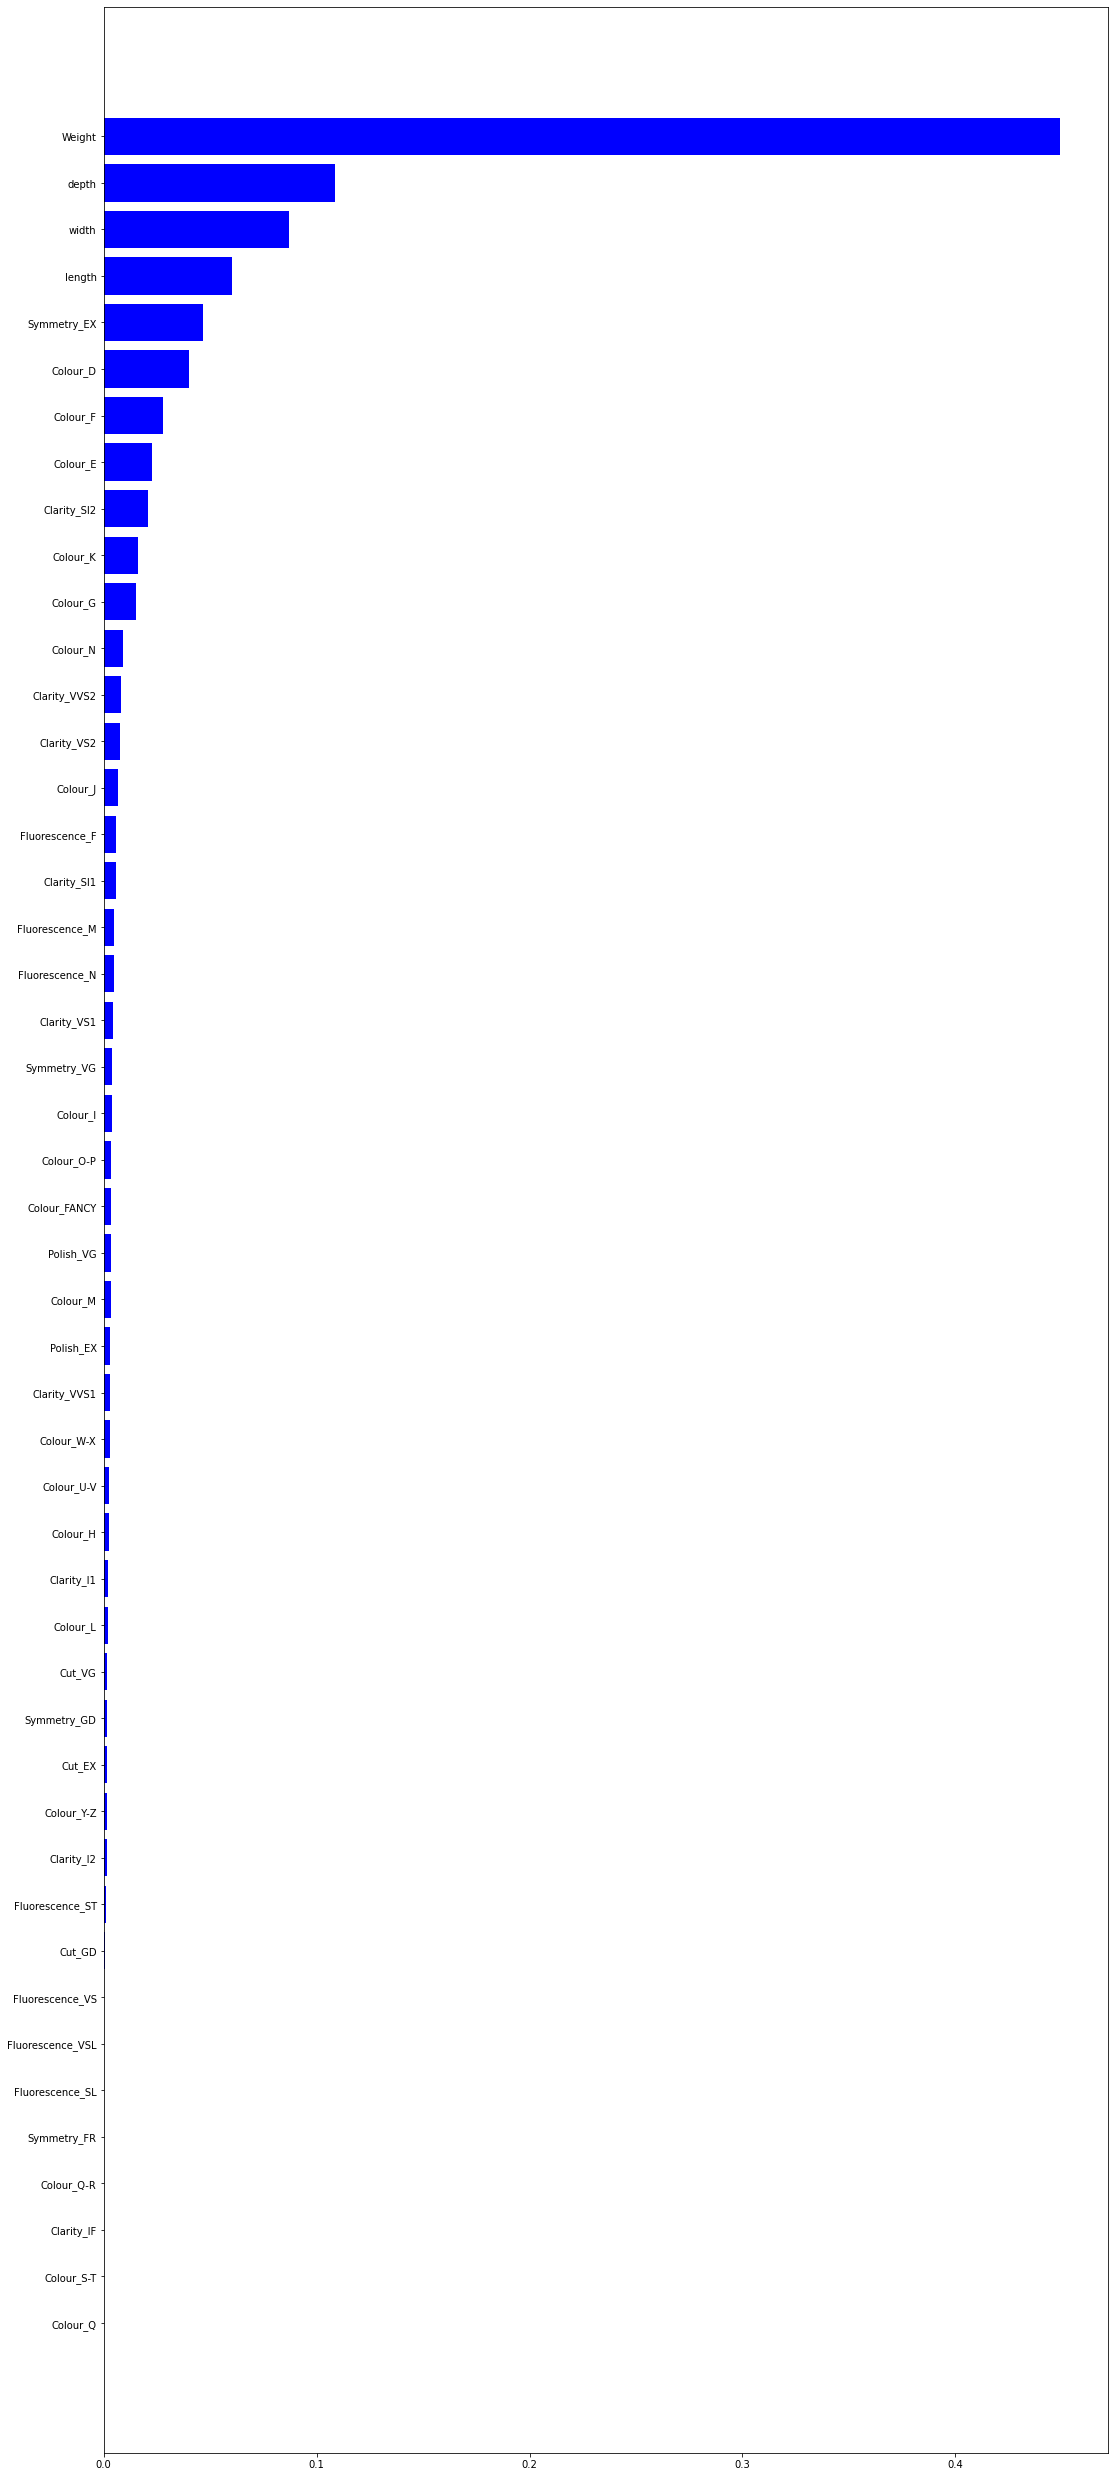

In [12]:
plt.figure(figsize= (18, 45))

feature_importance = rfr.feature_importances_
indices = np.argsort(feature_importance)


plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.show()

#  Price Prediction 

In [13]:
# View accuracy score
print('Accuracy for Train:', rfr.score(X_train, y_train) )
print('Accuracy for Test:', rfr.score(X_test, y_test) )

Accuracy for Train: 0.9626412636446028
Accuracy for Test: 0.7131369999095474


Validation accuracy is terrible, suggesting the problem of overfitting. This is probably due to applying Random Forest Regressor in a dataset with loads of categorical variable. 

If there are any better suggestions please leave it in the comments would really appreciate the learning experience. 

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions for the test set
y_pred = rfr_model.predict(X_test)

pred_res =pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
pred_res

,Actual,Predicted
54,1041.90,1165.7167
231,1987.41,1993.0142
122,1806.27,2023.1049
415,2498.20,2050.5089
179,1892.72,2238.7571
196,1927.09,2009.1981
96,1136.92,1080.1008
135,1832.93,2046.1047
362,2178.56,2217.7495
233,1990.56,2210.8106


In [15]:
from sklearn import metrics

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round( metrics.mean_absolute_error(y_test, y_pred),2 ))
print('Mean Squared Error:', round( metrics.mean_squared_error(y_test, y_pred), 2))

# Calculate mean absolute percentage error (MAPE)
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 166.37
Mean Squared Error: 64319.92
Accuracy: 89.59 %.
